## **Loading the Datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install datasets
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [ ]:
ds = load_dataset("dair-ai/emotion", "split")

df = pd.DataFrame(ds['train'])
print(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [ ]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


This shows the number of training samples for each of the emotion available. We see that that the dataset is a little skewed with more training samples for emotion 1 and less for the emotion 5

In [ ]:
emotion_classes = ds['train'].features['label'].names
df['emotion'] = df['label'].apply(lambda x: emotion_classes[x])
print(df.head())

                                                text  label  emotion
0                            i didnt feel humiliated      0  sadness
1  i can go from feeling so hopeless to so damned...      0  sadness
2   im grabbing a minute to post i feel greedy wrong      3    anger
3  i am ever feeling nostalgic about the fireplac...      2     love
4                               i am feeling grouchy      3    anger


## **Dataset Distribution**


Removing the "surprise" emotion from our Dataset

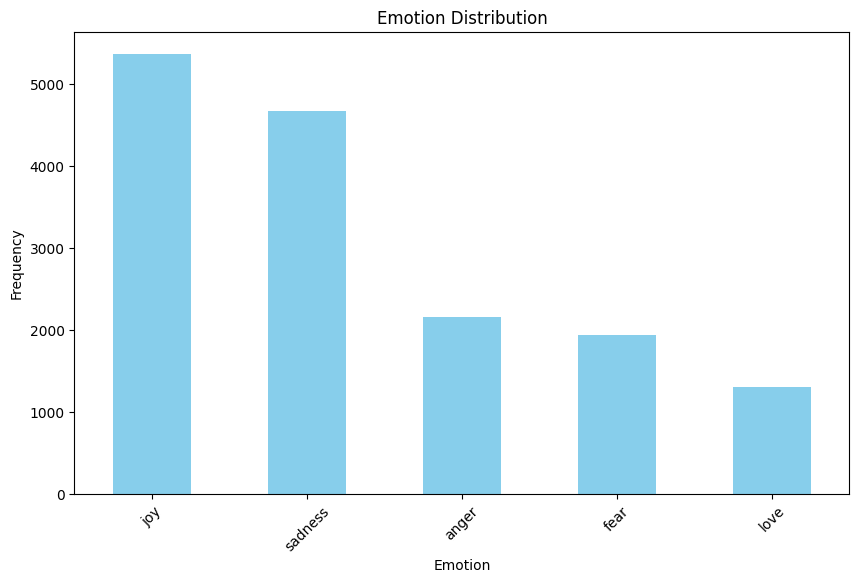

In [ ]:
df_filtered = df[df['label'] != 5]
emotion_counts = df_filtered['emotion'].value_counts()
# Plot the distribution of emotions
plt.figure(figsize=(10,6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.xticks(ticks=range(len(emotion_counts)), labels=emotion_counts.index, rotation=45)
plt.show()

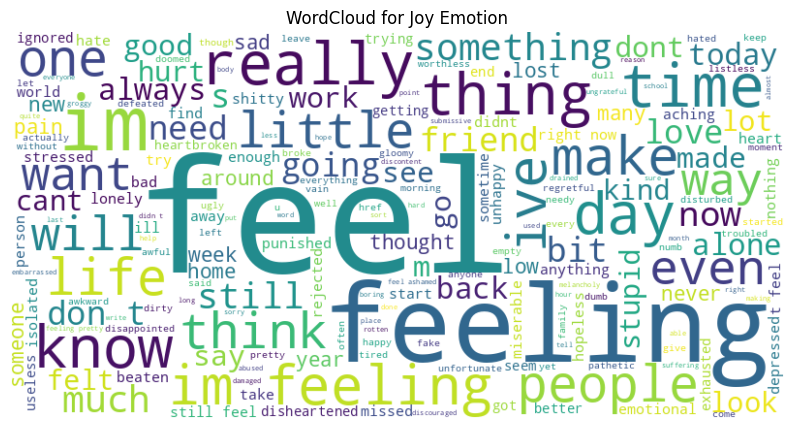

In [ ]:
from wordcloud import WordCloud

# Filter the DataFrame for a specific emotion (replace 0 with the actual label index for "joy")
emotion_data = df[df['label'] == 0]  # Assuming 0 is the label for "joy"

# Combine all text for the chosen emotion
text_data = " ".join(emotion_data['text'])

# Create a WordCloud for that emotion
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Joy Emotion')
plt.show()


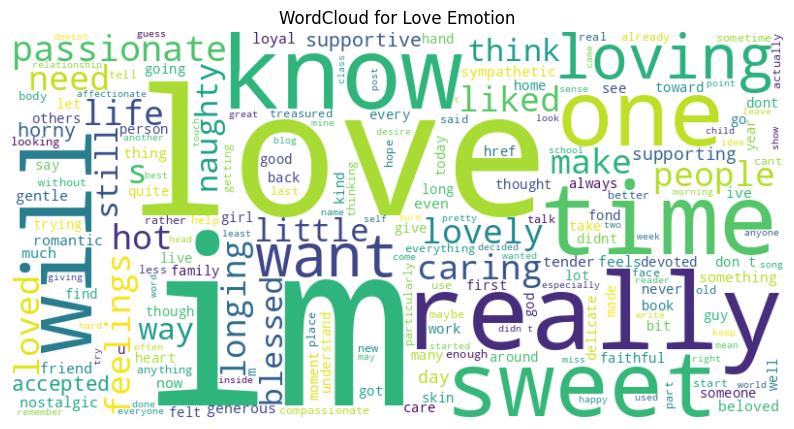

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['feel', 'feeling'])

# Filter the DataFrame for a specific emotion (replace 0 with the actual label index for "joy")
emotion_data = df[df['label'] == 2]  # Assuming 0 is the label for "joy"

# Combine all text for the chosen emotion
text_data = " ".join(emotion_data['text'])

# Create a WordCloud for that emotion
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Love Emotion')
plt.show()


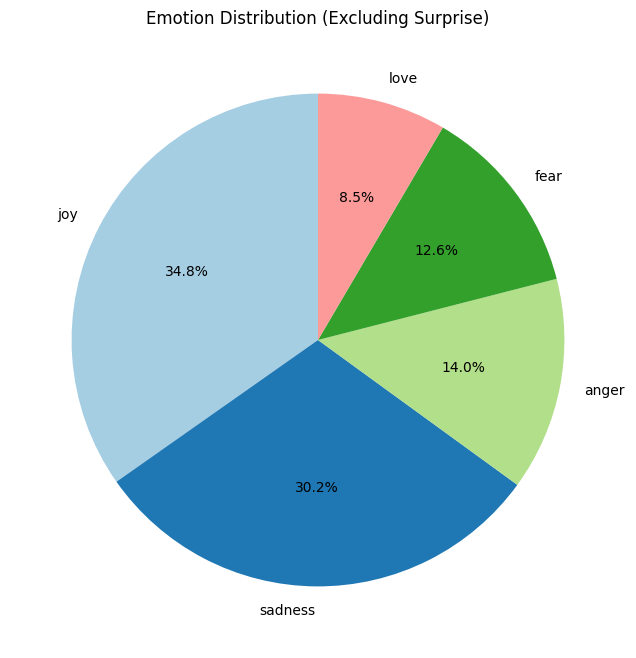

In [ ]:
# Exclude label 5 (surprise) from the DataFrame
df_filtered = df[df['label'] != 5]

# Get the emotion counts based on the 'emotion' column
emotion_counts = df_filtered['emotion'].value_counts()

# Plot emotion distribution as a pie chart
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Emotion Distribution (Excluding Surprise)")
plt.ylabel('')  # Hide the y-label to make it cleaner
plt.show()


<ipython-input-7-d13061edb585>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='emotion', order=df_filtered['emotion'].value_counts().index, palette="Set2")


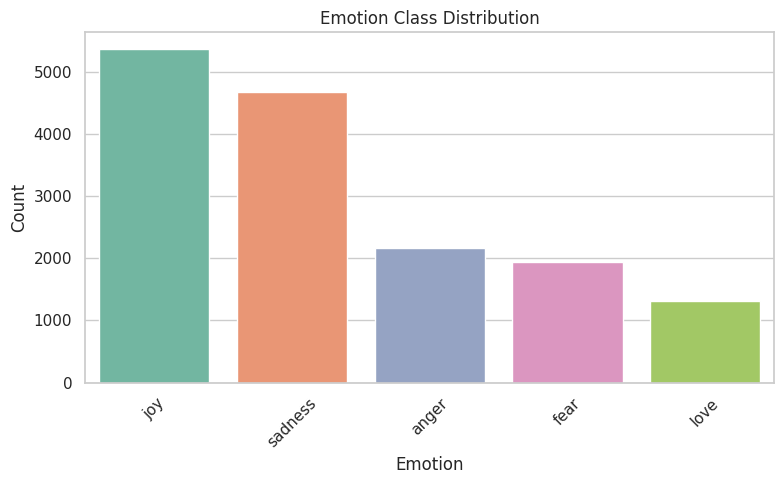

<ipython-input-7-d13061edb585>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text_length'] = df_filtered['text'].apply(len)
<ipython-input-7-d13061edb585>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['text'].apply(lambda x: len(x.split()))


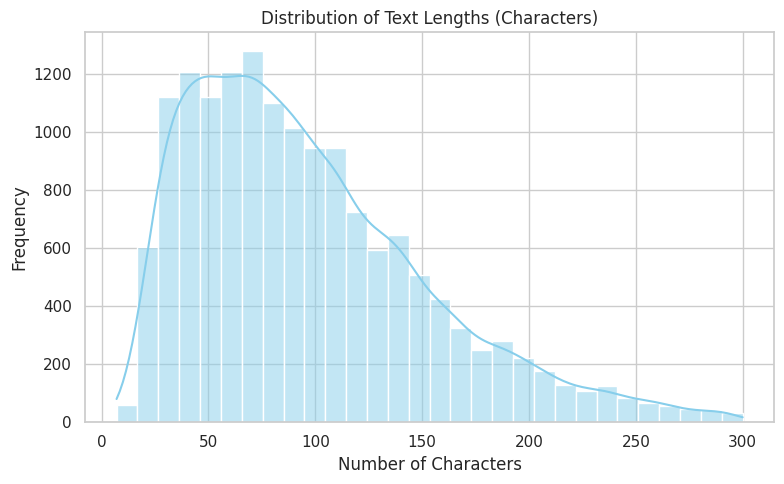

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='emotion', order=df_filtered['emotion'].value_counts().index, palette="Set2")
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_filtered['text_length'] = df_filtered['text'].apply(len)
df_filtered['word_count'] = df_filtered['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


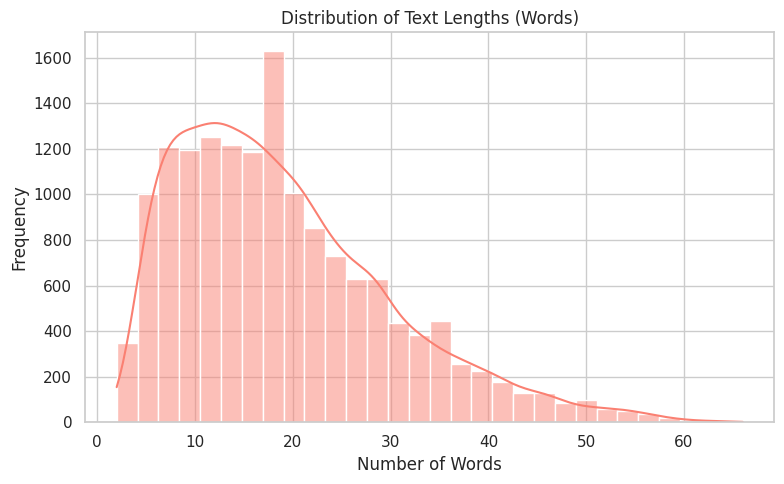

                                                text  emotion  text_length  \
0                            i didnt feel humiliated  sadness           23   
1  i can go from feeling so hopeless to so damned...  sadness          108   
2   im grabbing a minute to post i feel greedy wrong    anger           48   
3  i am ever feeling nostalgic about the fireplac...     love           92   
4                               i am feeling grouchy    anger           20   

   word_count  
0           4  
1          21  
2          10  
3          18  
4           4  


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['word_count'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Text Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional peek at updated dataframe
print(df_filtered[['text', 'emotion', 'text_length', 'word_count']].head())

## **Most Common Words**

Total words: 295238
Unique words: 14917

Top 20 most common words:
[('i', 24932), ('feel', 10827), ('and', 9235), ('to', 8705), ('the', 8035), ('a', 5944), ('feeling', 4903), ('that', 4900), ('of', 4799), ('my', 4120), ('in', 3302), ('it', 2992), ('like', 2818), ('so', 2435), ('for', 2360), ('im', 2339), ('me', 2220), ('but', 2164), ('have', 2142), ('was', 2115)]


<ipython-input-9-bf0faa6cc5eb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(freq_list), palette="viridis")


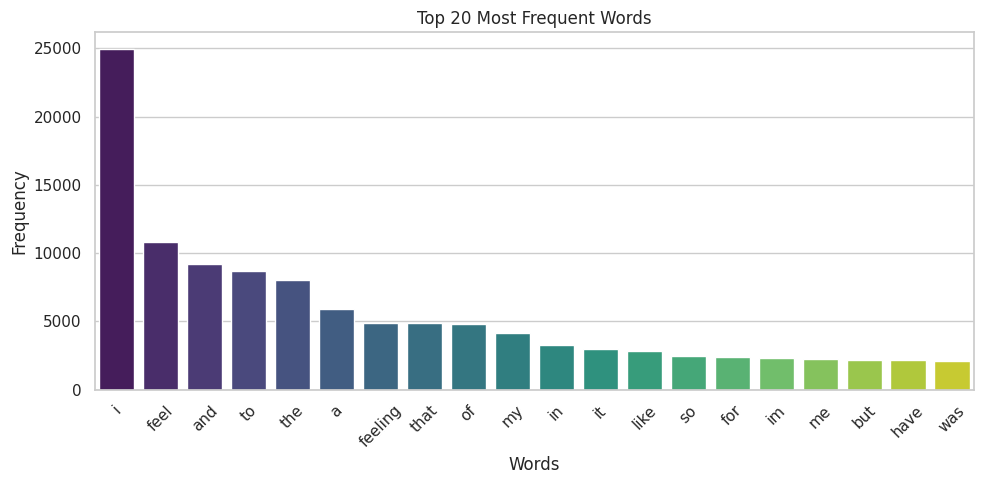

In [ ]:
import string
from collections import Counter

all_text = ' '.join(df_filtered['text']).lower()
all_text_clean = all_text.translate(str.maketrans('', '', string.punctuation))
words = all_text_clean.split()

unique_words = set(words)
print(f"Total words: {len(words)}")
print(f"Unique words: {len(unique_words)}")

# Optional: show top 20 frequent words
word_freq = Counter(words)
print("\nTop 20 most common words:")
print(word_freq.most_common(20))

top_words = word_freq.most_common(20)
words_list, freq_list = zip(*top_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words_list), y=list(freq_list), palette="viridis")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
